In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_excel(r'C:\Users\ysyzy\.ipynb_checkpoints\Region_sales_analysis\Regional Sales Dataset.xlsx',sheet_name=None)


In [107]:
df_sales = df['Sales Orders']
df_customers = df['Customers']
df_products = df['Products']
df_regions = df['Regions']
df_state_regions = df['State Regions']
df_2017_budget = df['2017 Budgets']

In [108]:
new_header = df_state_regions.iloc[0]
df_state_regions = df_state_regions[1:]
df_state_regions.columns = new_header


In [109]:
df_customers.columns

Index(['Customer Index', 'Customer Names'], dtype='object')

In [110]:
# merge with customers
df = df_sales.merge(df_customers,how='left',left_on='Customer Name Index',right_on='Customer Index')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [111]:
# merge with products
df = df.merge(df_products,how='left',left_on='Product Description Index',right_on='Index')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [112]:
# merge with regions
df = df.merge(df_regions,how='left',left_on='Delivery Region Index',right_on='id')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [113]:
# merge with state
df = df.merge(df_state_regions[['State Code','Region']], left_on='state_code', right_on='State Code', how='left')
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [114]:
df.columns = df.columns.str.lower()

In [115]:
# merge with budget
df = df.merge(df_2017_budget, left_on='product name', right_on='Product Name', how='left')
df.head()

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,population,households,median_income,land_area,water_area,time_zone,state code,region,Product Name,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,GA,South,Product 27,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,Product 20,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,Product 26,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,Product 7,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,Product 8,1085037.329


In [116]:
df.to_csv('Region_sales_analysis.csv')

In [117]:
#Customer Index
#Index
#id
#State Code
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code','Product Name']
df = df.drop(columns=cols_to_drop,errors='ignore')
df.head(5)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,area_code,population,households,median_income,land_area,water_area,time_zone,state code,region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [118]:
df.columns = df.columns.str.lower()

In [119]:
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer index',
       'customer names', 'index', 'product name', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'state code', 'region',
       '2017 budgets'], dtype=object)

In [120]:
# keep the important columns
df= df[['ordernumber','orderdate','channel','customer names','product name','order quantity','unit price','line total', 'total unit cost','state_code'
         ,'state','county','region','latitude',
       'longitude','2017 budgets']]

In [121]:
df.head()

,ordernumber,orderdate,channel,customer names,product name,order quantity,unit price,line total,total unit cost,state_code,state,county,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,Rhynoodle Ltd,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Distributor,Thoughtmix Ltd,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,Amerisourc Corp,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Export,Colgate-Pa Group,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Wholesale,Deseret Group,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,41.77524,-72.52443,1085037.329


In [122]:
df.loc[df['orderdate'].dt.year != 2017,'2017 budgets'] = pd.NA

In [123]:
df.rename(columns={
    'orderdate' : 'order_date',
    'product name': 'product_name',
    'customer names': 'customer_names',
    'unit price': 'unit_price',
    'line total': 'Revenue',
    'total unit cost': 'total_unit_cost',
    'state_code': 'state_code',
    'state': 'state',
    'county': 'county',
    'region': 'region',
    'latitude': 'latitude',
    'longitude': 'longitude',
    '2017 budgets': '2017_budgets'
}, inplace=True)

In [124]:
df.to_csv('final_Region_sales_analysis.csv')

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ordernumber      64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   channel          64104 non-null  object        
 3   customer_names   64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   Revenue          64104 non-null  float64       
 8   total_unit_cost  64104 non-null  float64       
 9   state_code       64104 non-null  object        
 10  state            64104 non-null  object        
 11  county           64104 non-null  object        
 12  region           64104 non-null  object        
 13  latitude         64104 non-null  float64       
 14  longitude        64104 non-null  float

In [126]:
df_2017 = df[df['order_date'].dt.year == 2017]
df_2017.isnull().sum()

ordernumber        0
order_date         0
channel            0
customer_names     0
product_name       0
order quantity     0
unit_price         0
Revenue            0
total_unit_cost    0
state_code         0
state              0
county             0
region             0
latitude           0
longitude          0
2017_budgets       0
dtype: int64

In [127]:
df_2017.head()

,ordernumber,order_date,channel,customer_names,product_name,order quantity,unit_price,Revenue,total_unit_cost,state_code,state,county,region,latitude,longitude,2017_budgets
46363,SO - 0002544,2017-01-01,Wholesale,NCS Group,Product 30,6,1239.5,7437.0,1028.785,NJ,New Jersey,Hudson County,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,Epic Group,Product 13,5,1829.1,9145.5,1207.206,CO,Colorado,Mesa County,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,Wholesale,State Ltd,Product 15,9,2412.0,21708.0,1664.280,CA,California,Los Angeles County,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Wholesale,Fivebridge Ltd,Product 8,8,904.5,7236.0,750.735,IA,Iowa,Dubuque County,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Wholesale,Tagfeed Ltd,Product 2,12,1112.2,13346.4,811.906,FL,Florida,Hernando County,South,28.47689,-82.52546,3050087.565


In [128]:
df.columns = df.columns.str.lower()

In [129]:
df.head()

,ordernumber,order_date,channel,customer_names,product_name,order quantity,unit_price,revenue,total_unit_cost,state_code,state,county,region,latitude,longitude,2017_budgets
0,SO - 000225,2014-01-01,Wholesale,Rhynoodle Ltd,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,Distributor,Thoughtmix Ltd,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,Wholesale,Amerisourc Corp,Product 26,6,978.2,5869.2,684.740,CA,California,Alameda County,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,Export,Colgate-Pa Group,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Monroe County,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,Wholesale,Deseret Group,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Hartford County,Northeast,41.77524,-72.52443,NaN


In [130]:
df['total_cost']=df['order quantity']*df['total_unit_cost']

In [131]:
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin'] = df['profit'] / df['revenue']*100
df.head(
    2
)

,ordernumber,order_date,channel,customer_names,product_name,order quantity,unit_price,revenue,total_unit_cost,state_code,state,county,region,latitude,longitude,2017_budgets,total_cost,profit,profit_margin
0,SO - 000225,2014-01-01,Wholesale,Rhynoodle Ltd,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,Chatham County,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,Thoughtmix Ltd,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Johnson County,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0


# EDA

In [138]:


# Assuming your DataFrame is named 'df' and order_date is in datetime format
# Filter out records from 2018-01 to 2018-02
start_date = '2018-01-01'
end_date = '2018-02-28'  # End of February 2018
df_new = df[~((df['order_date'] >= start_date) & (df['order_date'] <= end_date))]

# Optional: Reset index if needed
df_new = df_new.reset_index(drop=True)

C:\Users\ysyzy\AppData\Local\Temp\ipykernel_15200\2161688725.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_new.set_index('order_date')['revenue'].resample('M').sum()


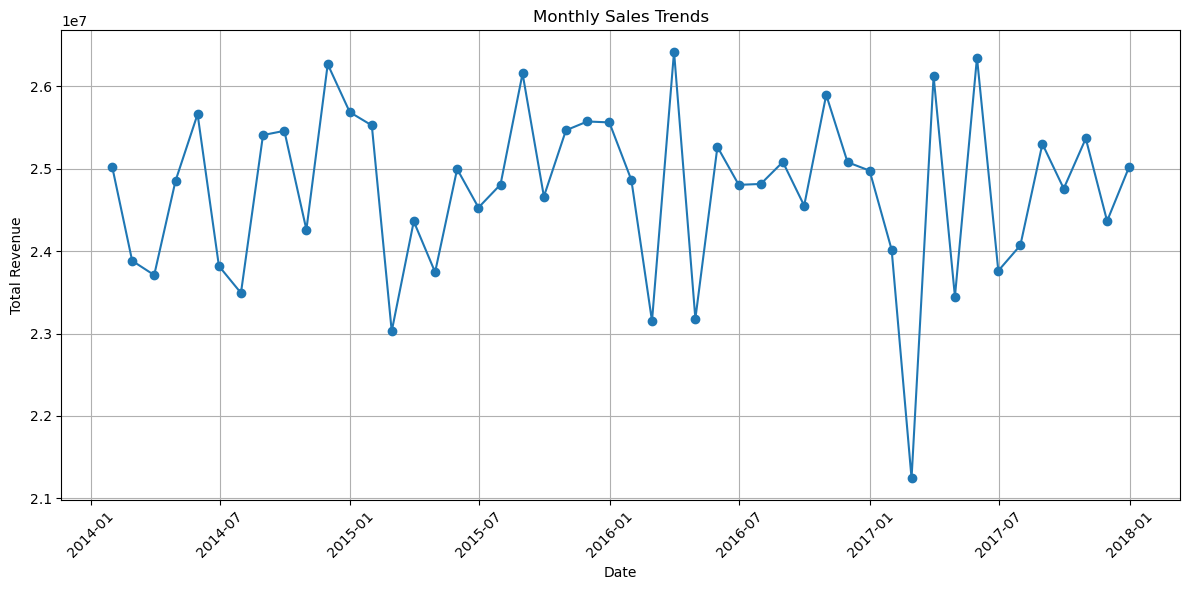

In [140]:
df_new['order_month'] = df_new['order_date'].dt.to_period('M')
monthly_sales = df_new.set_index('order_date')['revenue'].resample('M').sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

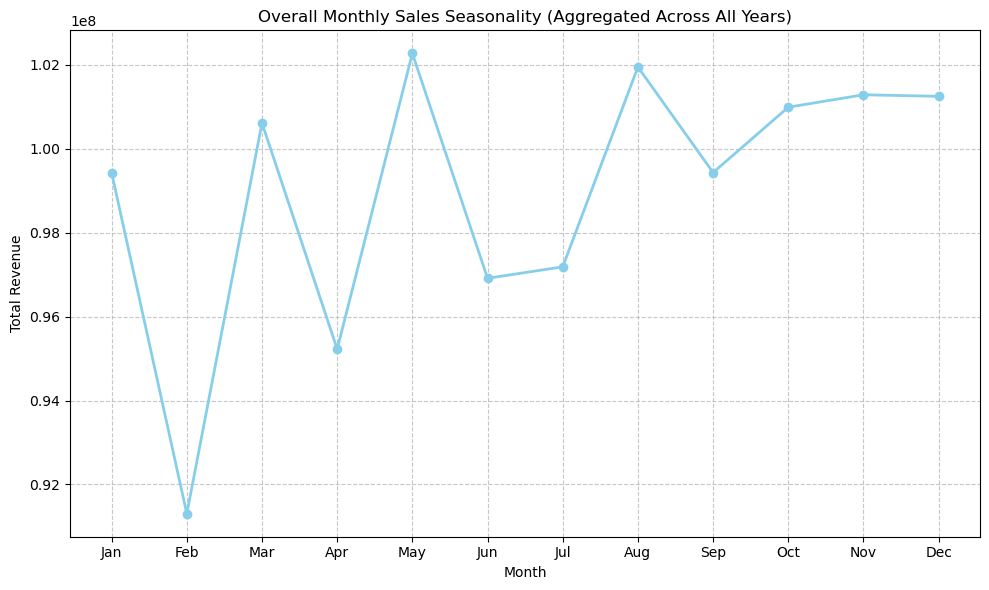

In [141]:

# Assuming your DataFrame is named 'df'
# Convert order_date to datetime (if not already done)
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract the month (1-12) from order_date
df_new['month'] = df_new['order_date'].dt.month

# Group by month and sum the revenue across all years
monthly_aggregate = df_new.groupby('month')['revenue'].sum().reset_index()

# Create the line plot for seasonality
plt.figure(figsize=(10, 6))
plt.plot(monthly_aggregate['month'], monthly_aggregate['revenue'], marker='o', color='skyblue', linewidth=2)
plt.title('Overall Monthly Sales Seasonality (Aggregated Across All Years)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\ysyzy\AppData\Local\Temp\ipykernel_15200\3847606448.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='Reds_d')


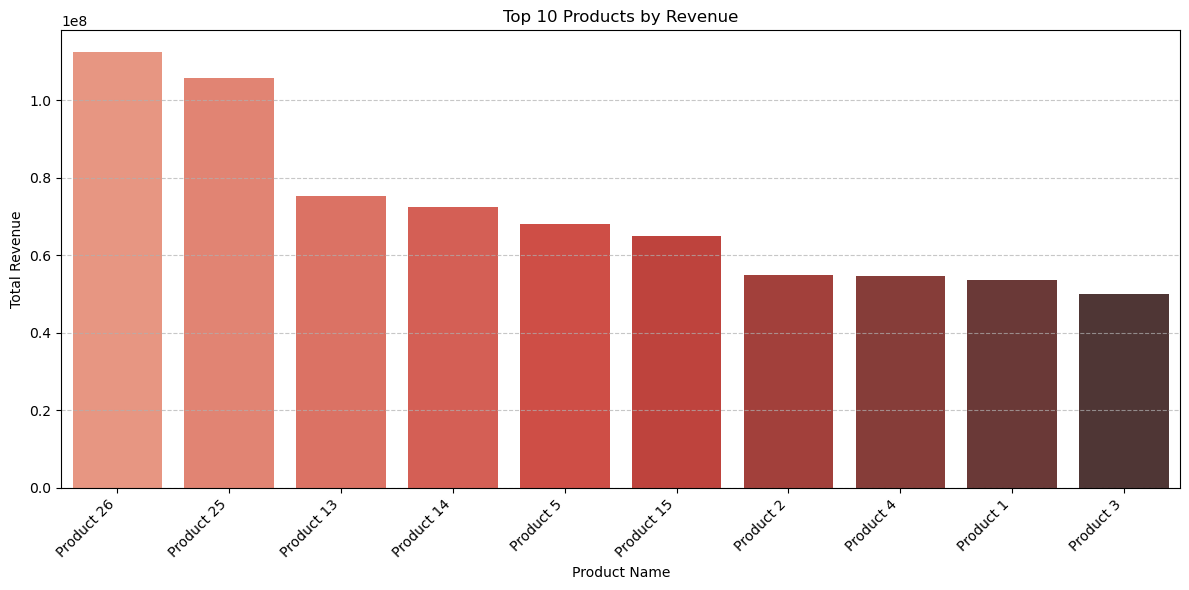

In [145]:

# Assuming your DataFrame is named 'df'
# Group by product_name and sum the revenue
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Sort by revenue in descending order and get top 10
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='Reds_d')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\ysyzy\AppData\Local\Temp\ipykernel_15200\3037092205.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='Reds_d')


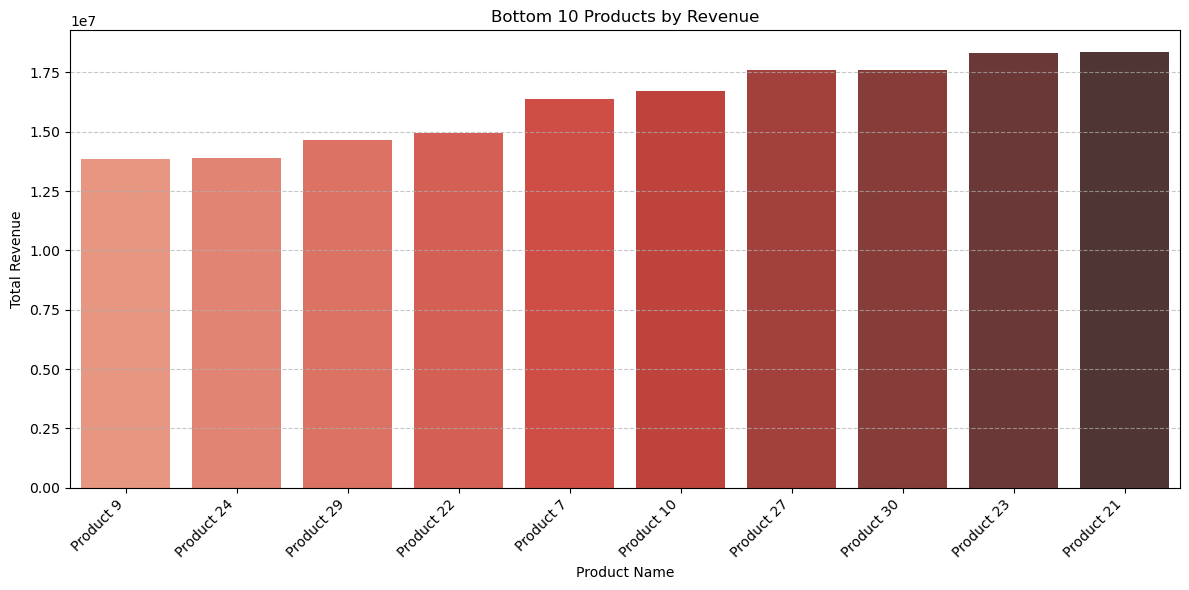

In [144]:

# Group by product_name and sum the revenue
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()

# Sort by revenue in ascending order and get bottom 10
bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Create the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='Reds_d')
plt.title('Bottom 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

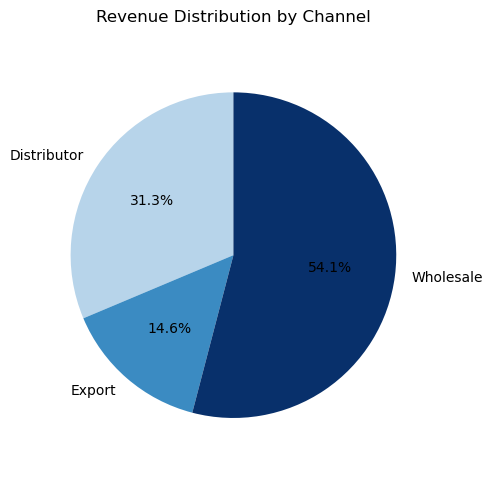

In [151]:

import matplotlib.cm as cm

channel_revenue = df.groupby('channel')['revenue'].sum().reset_index()

# Generate gradient blue colors from Blues colormap
num_channels = len(channel_revenue)
blue_gradient = cm.Blues(np.linspace(0.3, 1, num_channels))  # Gradient from light to dark blue

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(channel_revenue['revenue'], labels=channel_revenue['channel'], 
        autopct='%1.1f%%', startangle=90, colors=blue_gradient)
plt.title('Revenue Distribution by Channel')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()

(array([797., 339., 388., 793., 745., 814., 682., 630., 405., 351., 333.,
        364., 419., 299., 357., 195., 237., 239., 187., 268., 176., 121.,
        205.,  83., 191.,  86.,  88., 142.,  45., 116.,  73.,  42.,  36.,
         33.,  35.,  68.,  57.,  21.,  28.,  22.,  31.,  34.,  24.,  16.,
         19.,  14.,   9.,   9.,  10.,   8.]),
 array([  3484.   ,  12859.712,  22235.424,  31611.136,  40986.848,
         50362.56 ,  59738.272,  69113.984,  78489.696,  87865.408,
         97241.12 , 106616.832, 115992.544, 125368.256, 134743.968,
        144119.68 , 153495.392, 162871.104, 172246.816, 181622.528,
        190998.24 , 200373.952, 209749.664, 219125.376, 228501.088,
        237876.8  , 247252.512, 256628.224, 266003.936, 275379.648,
        284755.36 , 294131.072, 303506.784, 312882.496, 322258.208,
        331633.92 , 341009.632, 350385.344, 359761.056, 369136.768,
        378512.48 , 387888.192, 397263.904, 406639.616, 416015.328,
        425391.04 , 434766.752, 444142.464, 45

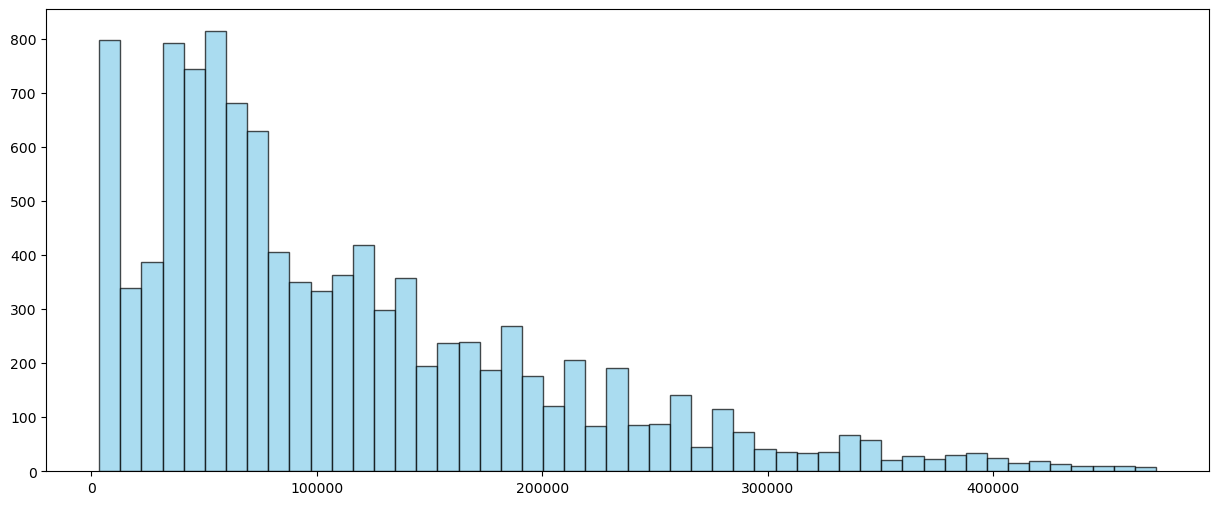

In [155]:
aov = df.groupby('ordernumber')['revenue'].sum()

plt.figure(figsize=(15, 6))

plt.hist(aov, bins=50, color='skyblue', edgecolor='black', alpha=0.7)

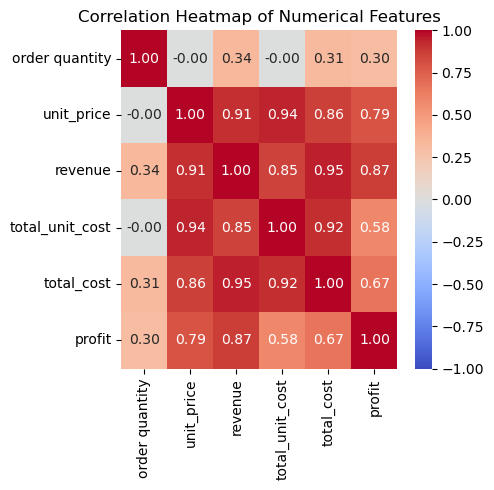

In [162]:

# Assuming your DataFrame is named 'df'
# Select numerical columns for correlation analysis
numerical_columns = ['order quantity', 'unit_price', 'revenue', 'total_unit_cost',
                     'total_cost', 'profit']
df_numerical = df[numerical_columns]

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

# Create the correlation heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

C:\Users\ysyzy\AppData\Local\Temp\ipykernel_15200\1211021062.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='Blues')


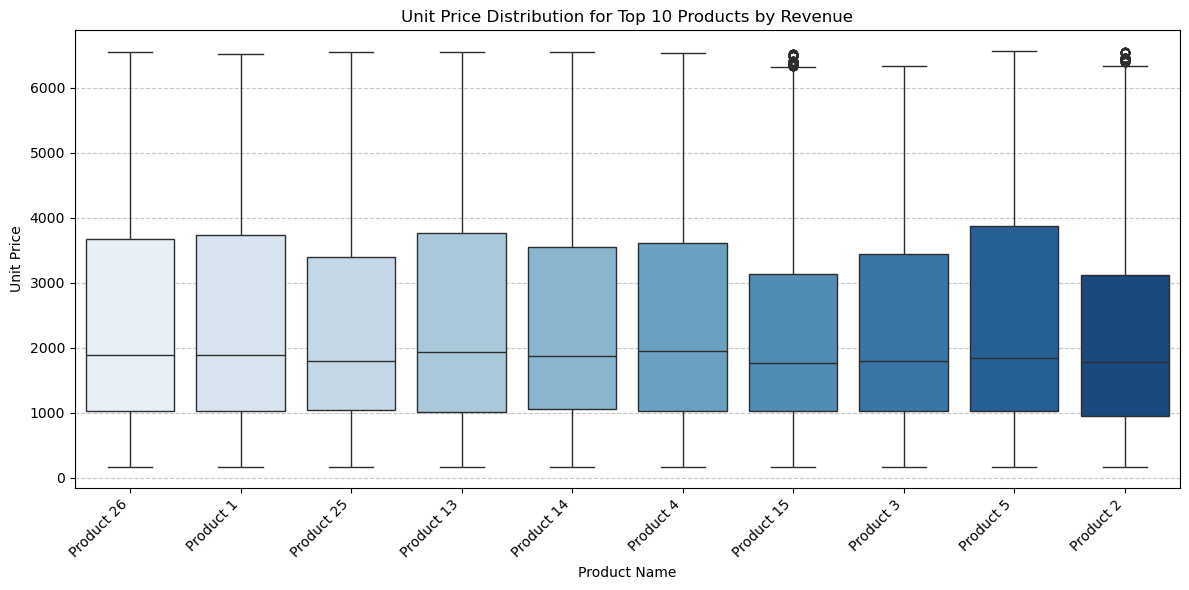

In [163]:

# Assuming your DataFrame is named 'df'
# Get top 10 products by total revenue
top_10_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10).index

# Filter DataFrame to include only top 10 products
df_top_10 = df[df['product_name'].isin(top_10_products)]

# Create the boxplot for unit price distribution per product
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='Blues')
plt.title('Unit Price Distribution for Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

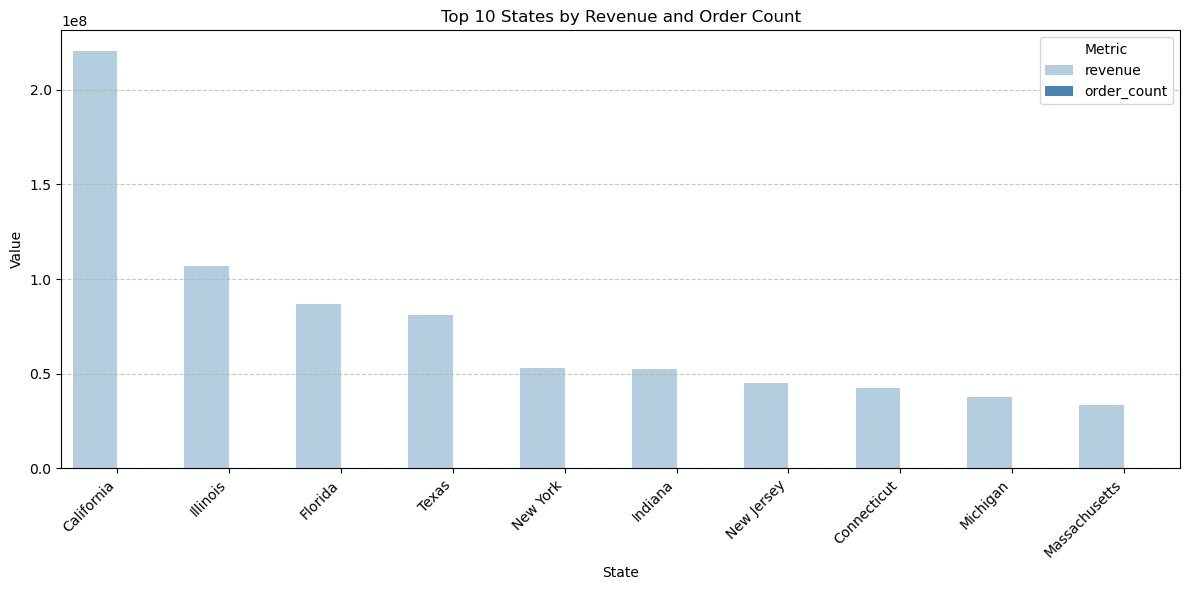

In [164]:

# Assuming your DataFrame is named 'df'
# Group by state to calculate total revenue and order count
state_metrics = df.groupby('state').agg({
    'revenue': 'sum',
    'ordernumber': 'count'  # Count of orders
}).reset_index()

# Rename ordernumber to order_count for clarity
state_metrics = state_metrics.rename(columns={'ordernumber': 'order_count'})

# Sort by revenue and select top 10 states
top_10_states = state_metrics.sort_values(by='revenue', ascending=False).head(10)

# Melt the DataFrame to long format for grouped bar plot
top_10_melted = pd.melt(top_10_states, id_vars='state', 
                        value_vars=['revenue', 'order_count'], 
                        var_name='Metric', value_name='Value')

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_melted, x='state', y='Value', hue='Metric', palette='Blues')
plt.title('Top 10 States by Revenue and Order Count')
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

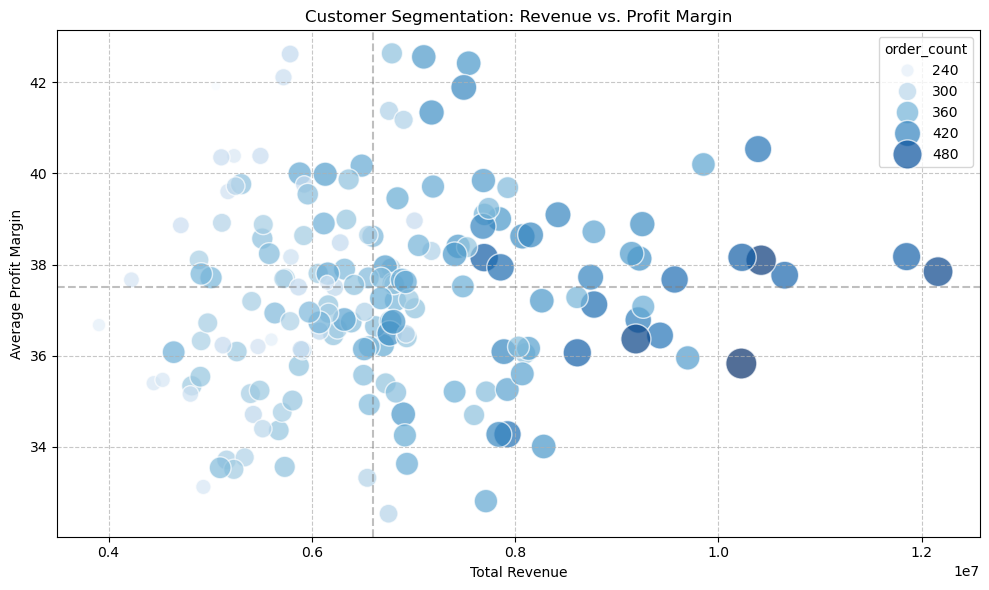

In [165]:


# Assuming your DataFrame is named 'df'
# Aggregate by customer_names: total revenue, average profit_margin, and order count
customer_metrics = df.groupby('customer_names').agg({
    'revenue': 'sum',
    'profit_margin': 'mean',
    'ordernumber': 'count'
}).reset_index()

# Rename ordernumber to order_count for clarity
customer_metrics = customer_metrics.rename(columns={'ordernumber': 'order_count'})

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_metrics, x='revenue', y='profit_margin', 
                size='order_count', hue='order_count', palette='Blues', 
                sizes=(50, 500), alpha=0.7)

# Add quadrant lines for segmentation (based on median values)
plt.axvline(x=customer_metrics['revenue'].median(), color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=customer_metrics['profit_margin'].median(), color='gray', linestyle='--', alpha=0.5)

# Customize plot
plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue')
plt.ylabel('Average Profit Margin')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()